# Evaluation Phase 1 Modell M1

In [2]:
import arrow
import numpy as np
import os
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [3]:
%run -i ./scripts/setConfigs.py

Set configs..


In [4]:
from matplotlib import rc
rc('text', usetex=True)

In [5]:
os.chdir(os.path.join(exp_data_path, 'experiment'))
extension = 'csv'
result = glob.glob('*.{}'.format(extension))

In [6]:
len(result)

97

In [7]:
df_experiments = pd.read_csv(result[0])

In [8]:
df_experiments.head()

,Unnamed: 0,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,model_fn,logreg_fn,num_samples_x_test,num_samples_x_ano_drifted,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_ano_drifted,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,F1_x_test,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted,F1_x_ano_drifted
0,0,Adam,15,0.1,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2407,32543,0,90,2417,29230,3313,80,99.743151,100.0,93.113019,96.395675,98.164763,90.316781,42.181501,92.362625,96.796155,58.757749


In [9]:
for file in result[1:]:
    df = pd.read_csv(file)
    df_experiments = df_experiments.append(df)

In [10]:
len(df_experiments)

97

In [11]:
os.chdir('..')
os.chdir('..')
print(os.getcwd())

/home/torge/dev/masterthesis_code/02_Experimente/03_Experimente


In [12]:
df_experiments.drop('Unnamed: 0', axis=1, inplace=True)

## Select best and worst models

In [14]:
df_best = df_experiments.copy()
df_worst = df_experiments.copy()

In [15]:
df_top_3_worst = df_worst.sort_values(by=['Precision_x_ano_drifted'], ascending=False).head(3)

In [17]:
fn = '{}_top_3_worst_models_by_precision.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data','selected_models_fn', fn )
df_top_3_worst[['model_fn', 'logreg_fn', 'Precision_x_ano_drifted', 'Accuracy_x_ano_drifted']].to_csv(full_fn, sep=';', index=False)

In [22]:
df_top_3_worst.head()

,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,model_fn,logreg_fn,num_samples_x_test,num_samples_x_ano_drifted,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_ano_drifted,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,F1_x_test,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted,F1_x_ano_drifted
0,Adam,10,0.01,500,10,64,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2415,32543,0,82,2426,29230,3313,71,99.765982,100.0,93.091710,96.716059,98.330619,90.342466,42.272173,92.336366,97.156588,58.912093
0,SGD,5,0.01,300,5,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2414,32543,0,83,2423,29230,3313,74,99.763128,100.0,93.094373,96.676011,98.309917,90.333904,42.241980,92.345117,97.036444,58.860683
0,SGD,10,0.10,500,5,64,16,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2411,32543,0,86,2422,29230,3313,75,99.754566,100.0,93.102363,96.555867,98.247759,90.331050,42.231909,92.348035,96.996396,58.843537


In [19]:
df_top_3_best = df_best.sort_values(by=['Precision_x_ano_drifted'], ascending=True).head(3)

In [20]:
fn = '{}_top_3_best_models_by_precision.csv'.format(arrow.now().format('YYYYMMDD'))
full_fn = os.path.join(os.getcwd(), 'exp_data','selected_models_fn', fn )
df_top_3_best[['model_fn', 'logreg_fn', 'Precision_x_ano_drifted', 'Accuracy_x_ano_drifted']].to_csv(full_fn, sep=';', index=False)

In [21]:
df_experiments.head()

,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,model_fn,logreg_fn,num_samples_x_test,num_samples_x_ano_drifted,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_ano_drifted,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,F1_x_test,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted,F1_x_ano_drifted
0,Adam,15,0.10,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2407,32543,0,90,2417,29230,3313,80,99.743151,100.0,93.113019,96.395675,98.164763,90.316781,42.181501,92.362625,96.796155,58.757749
0,SGD,15,0.01,100,20,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2401,32543,0,96,2410,29230,3313,87,99.726027,100.0,93.129006,96.155386,98.040016,90.296804,42.110781,92.383059,96.515819,58.637470
0,SGD,15,0.10,300,20,32,16,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2391,32543,0,106,2401,29230,3313,96,99.697489,100.0,93.155665,95.754906,97.831424,90.271119,42.019601,92.409345,96.155386,58.482523
0,SGD,10,0.10,100,20,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2397,32543,0,100,2406,29230,3313,91,99.714612,100.0,93.139668,95.995194,97.956682,90.285388,42.070292,92.394740,96.355627,58.568647
0,SGD,10,0.01,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2406,32543,0,91,2414,29230,3313,83,99.740297,100.0,93.115683,96.355627,98.143993,90.308219,42.151214,92.371382,96.676011,58.706226


In [13]:
result_cols_x_test = ['Accuracy_x_test', 'Precision_x_test', 'Specifity_x_test', 'Sensitivity_x_test']
result_cols_x_drifted_ano = ['Accuracy_x_ano_drifted', 'Precision_x_ano_drifted', 'Specifity_x_ano_drifted', 'Sensitivity_x_ano_drifted']

In [14]:
df_res_x_test = df_experiments[result_cols_x_test]
df_res_x_drifted_ano = df_experiments[result_cols_x_drifted_ano]

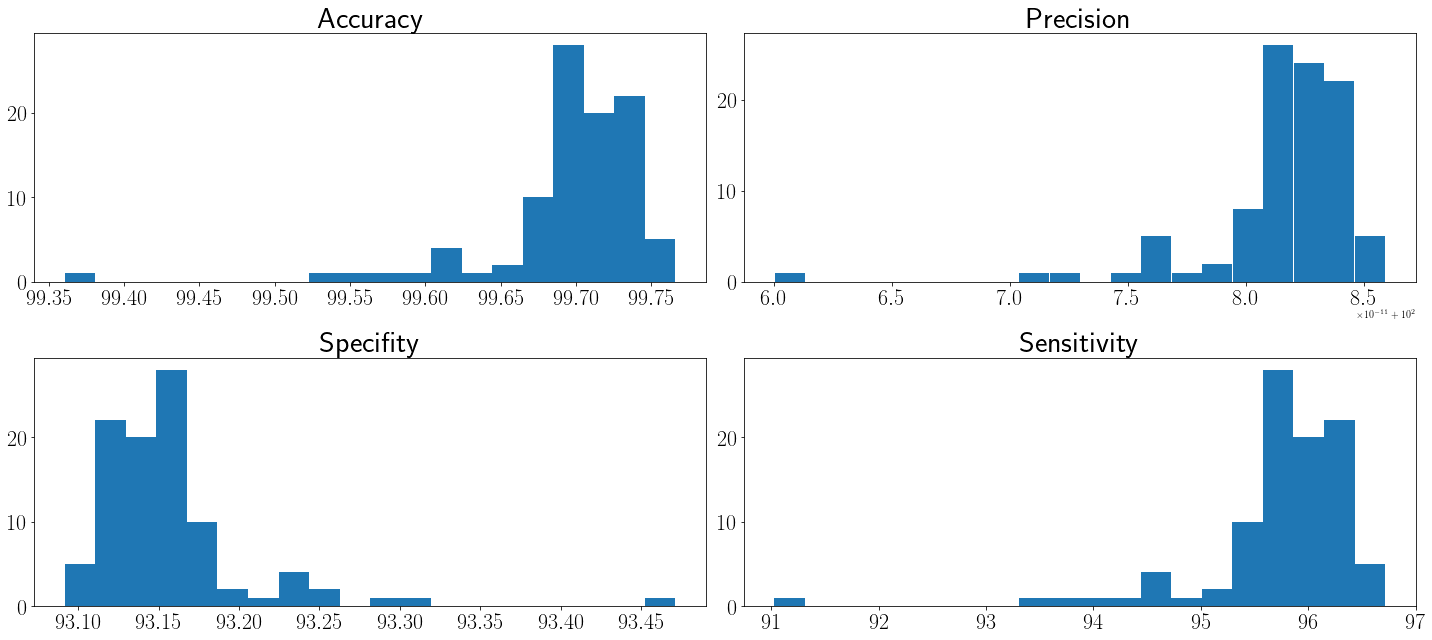

In [31]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

#df_res_x_test['Accuracy_x_test'].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].hist(df_res_x_test['Accuracy_x_test'], bins=20)
ax[0][0].set_title('Accuracy',fontsize=30)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

ax[0][1].hist(df_res_x_test['Precision_x_test'], bins=20)
ax[0][1].set_title('Precision',fontsize=30)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][0].hist(df_res_x_test['Specifity_x_test'], bins=20)
ax[1][0].set_title('Specifity',fontsize=30)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

ax[1][1].hist(df_res_x_test['Sensitivity_x_test'], bins=20)
ax[1][1].set_title('Sensitivity',fontsize=30)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

#fig.suptitle('Histogramme der Kennzahlen der Modelle des Versuchsplans $\displaystyle tVP^{I}_{M_1}$ auf  $X_{test}$', fontsize=30)

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_results_tvp_1_m1_hists_x_test.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

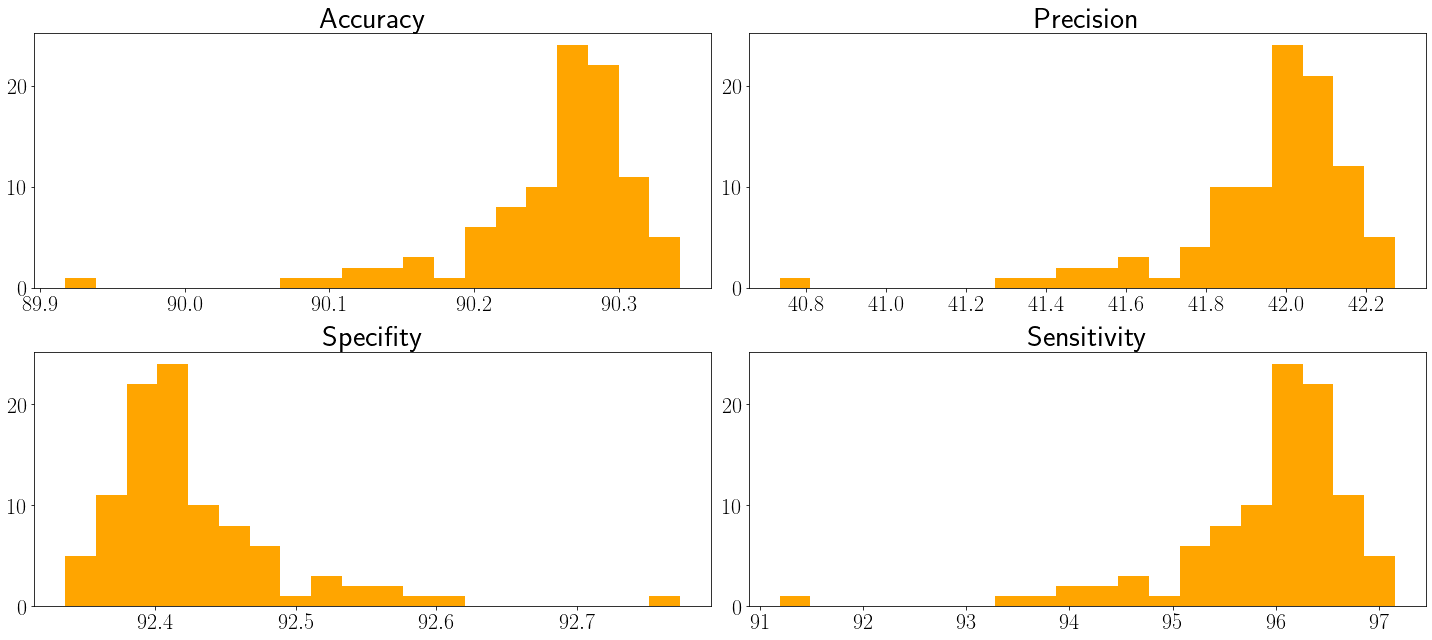

In [32]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

ax[0][0].hist(df_res_x_drifted_ano['Accuracy_x_ano_drifted'], bins=20, color='orange')
ax[0][0].set_title('Accuracy',fontsize=30)
ax[0][0].tick_params(axis='both', which='major', labelsize=22)

ax[0][1].hist(df_res_x_drifted_ano['Precision_x_ano_drifted'], bins=20, color='orange')
ax[0][1].set_title('Precision',fontsize=30)
ax[0][1].tick_params(axis='both', which='major', labelsize=22)

ax[1][0].hist(df_res_x_drifted_ano['Specifity_x_ano_drifted'], bins=20, color='orange')
ax[1][0].set_title('Specifity',fontsize=30)
ax[1][0].tick_params(axis='both', which='major', labelsize=22)

ax[1][1].hist(df_res_x_drifted_ano['Sensitivity_x_ano_drifted'], bins=20, color='orange')
ax[1][1].set_title('Sensitivity',fontsize=30)
ax[1][1].tick_params(axis='both', which='major', labelsize=22)

#fig.suptitle('Histogramme der Kennzahlen der Modelle des Versuchsplans $\displaystyle tVP^{I}_{M_1}$ auf  $X_{drifted,ano}$', fontsize=30)

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

save = True
if save:
    fn = os.path.join(os.getcwd(), 'figs', '{}_results_tvp_1_m1_hists_x_drifted_ano.pdf'.format(arrow.now().format('YYYYMMDD')))
    fig.savefig(fn, bbox_inches='tight', pad_inches=0)

In [33]:
df_res_x_drifted_ano.describe()

,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted
count,97.000000,97.000000,97.000000,97.000000
mean,90.254466,41.959457,92.426440,95.921704
std,0.063274,0.227448,0.064899,0.887908
min,89.917237,40.733453,92.336366,91.189427
25%,90.234018,41.887388,92.388899,95.634762
50%,90.268265,42.009452,92.412267,96.115338
75%,90.291096,42.090544,92.447340,96.435723
max,90.342466,42.272173,92.773035,97.156588


In [34]:
df_res_x_test.describe()

,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test
count,97.000000,9.700000e+01,97.000000,97.000000
mean,99.695782,1.000000e+02,93.157287,95.730960
std,0.054446,3.426260e-12,0.050961,0.764039
min,99.360731,1.000000e+02,93.091710,91.029235
25%,99.686073,1.000000e+02,93.129006,95.594714
50%,99.703196,1.000000e+02,93.150332,95.835002
75%,99.726027,1.000000e+02,93.166333,96.155386
max,99.765982,1.000000e+02,93.471392,96.716059


In [54]:
df_experiments.head()

,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,model_fn,logreg_fn,num_samples_x_test,num_samples_x_ano_drifted,TP_x_test,TN_x_test,FP_x_test,FN_x_test,TP_x_ano_drifted,TN_x_ano_drifted,FP_x_ano_drifted,FN_x_ano_drifted,Accuracy_x_test,Precision_x_test,Specifity_x_test,Sensitivity_x_test,F1_x_test,Accuracy_x_ano_drifted,Precision_x_ano_drifted,Specifity_x_ano_drifted,Sensitivity_x_ano_drifted,F1_x_ano_drifted
0,Adam,15,0.10,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2407,32543,0,90,2417,29230,3313,80,99.743151,100.0,93.113019,96.395675,98.164763,90.316781,42.181501,92.362625,96.796155,58.757749
0,SGD,15,0.01,100,20,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2401,32543,0,96,2410,29230,3313,87,99.726027,100.0,93.129006,96.155386,98.040016,90.296804,42.110781,92.383059,96.515819,58.637470
0,SGD,15,0.10,300,20,32,16,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2391,32543,0,106,2401,29230,3313,96,99.697489,100.0,93.155665,95.754906,97.831424,90.271119,42.019601,92.409345,96.155386,58.482523
0,SGD,10,0.10,100,20,128,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2397,32543,0,100,2406,29230,3313,91,99.714612,100.0,93.139668,95.995194,97.956682,90.285388,42.070292,92.394740,96.355627,58.568647
0,SGD,10,0.01,100,5,32,32,/home/torge/dev/masterthesis_code/02_Experimen...,/home/torge/dev/masterthesis_code/02_Experimen...,35040,35040,2406,32543,0,91,2414,29230,3313,83,99.740297,100.0,93.115683,96.355627,98.143993,90.308219,42.151214,92.371382,96.676011,58.706226


In [58]:
exp = df_experiments[['optimizer', 'adaption_steps', 'meta_lr', 'num_iterations', 'k_train', 'num_train', 'num_eval', 'Accuracy_x_test', 'Accuracy_x_ano_drifted']]

In [59]:
exp

,optimizer,adaption_steps,meta_lr,num_iterations,k_train,num_train,num_eval,Accuracy_x_test,Accuracy_x_ano_drifted
0,Adam,15,0.100,100,5,32,32,99.743151,90.316781
0,SGD,15,0.010,100,20,128,32,99.726027,90.296804
0,SGD,15,0.100,300,20,32,16,99.697489,90.271119
0,SGD,10,0.100,100,20,128,32,99.714612,90.285388
0,SGD,10,0.010,100,5,32,32,99.740297,90.308219
...,...,...,...,...,...,...,...,...,...
0,SGD,10,0.100,500,5,64,16,99.754566,90.331050
0,SGD,15,0.100,500,5,128,16,99.717466,90.288242
0,SGD,10,0.010,500,20,64,32,99.700342,90.276826
0,SGD,15,0.001,500,5,32,16,99.657534,90.234018
